In [20]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the image folder path and CSV file path
image_folder = 'images_original'
csv_file = 'images.csv'

# Load the CSV file
df = pd.read_csv(csv_file)
image_names = df['image'].values
labels = df['label'].values

# Set the desired labels to keep
desired_labels = ['T-Shirt', 'Pants', 'Longsleeve', 'Dress', 'Outwear', 'Shirt', 'Shoes']

# Filter the data based on the desired labels
desired_indices = [i for i, label in enumerate(labels) if label in desired_labels]
desired_image_names = image_names[desired_indices]
desired_labels = labels[desired_indices]

# Encode the labels numerically
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(desired_labels)

# Split the data into train and test sets
train_image_names, test_image_names, train_labels, test_labels = train_test_split(
    desired_image_names, labels_encoded, test_size=0.2, random_state=42)

def load_and_preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((64, 64))  # resize to the model input size
    if image.mode != 'RGB':  # if the image is grayscale
        image = image.convert('RGB')  # convert it to RGB
    image = np.array(image) / 255.0  # normalize pixel values to [0, 1]
    return image

# Load the train and test image data
train_images = np.array([load_and_preprocess_image(os.path.join(image_folder, name+'.jpg')) for name in train_image_names])
test_images = np.array([load_and_preprocess_image(os.path.join(image_folder, name+'.jpg')) for name in test_image_names])

# Data augmentation
datagen = ImageDataGenerator(horizontal_flip=True)

# Create empty arrays to store augmented training images and labels
augmented_train_images = []
augmented_train_labels = []

# Perform data augmentation on each training image and store them
for image, label in zip(train_images, train_labels):
    augmented_train_images.append(image)
    augmented_train_labels.append(label)
    # flip the images
    augmented_image = datagen.apply_transform(image, {'flip_horizontal': True})
    augmented_train_images.append(augmented_image)
    augmented_train_labels.append(label)

# Convert the lists to NumPy arrays
augmented_train_images = np.array(augmented_train_images)
augmented_train_labels = np.array(augmented_train_labels)

# Building the CNN model
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Training the model
model.fit(augmented_train_images, augmented_train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

# Evaluating the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)



Epoch 1/10
194/194 [==============================] - 11s 53ms/step - loss: 1.6830 - accuracy: 0.3868 - val_loss: 1.3818 - val_accuracy: 0.4691
Epoch 2/10
194/194 [==============================] - 10s 53ms/step - loss: 1.1570 - accuracy: 0.5817 - val_loss: 1.2276 - val_accuracy: 0.5696
Epoch 3/10
194/194 [==============================] - 11s 54ms/step - loss: 0.9299 - accuracy: 0.6649 - val_loss: 1.0935 - val_accuracy: 0.6289
Epoch 4/10
194/194 [==============================] - 11s 55ms/step - loss: 0.7657 - accuracy: 0.7268 - val_loss: 1.0779 - val_accuracy: 0.6379
Epoch 5/10
194/194 [==============================] - 11s 57ms/step - loss: 0.6361 - accuracy: 0.7748 - val_loss: 1.0443 - val_accuracy: 0.6572
Epoch 6/10
194/194 [==============================] - 11s 57ms/step - loss: 0.5180 - accuracy: 0.8185 - val_loss: 1.0731 - val_accuracy: 0.6521
Epoch 7/10
194/194 [==============================] - 10s 54ms/step - loss: 0.4151 - accuracy: 0.8653 - val_loss: 1.1195 - val_accuracy:

Epoch 1/10
194/194 [==============================] - 11s 55ms/step - loss: 0.1625 - accuracy: 0.9594 - val_loss: 1.3604 - val_accuracy: 0.6585
Epoch 2/10
194/194 [==============================] - 11s 57ms/step - loss: 0.1298 - accuracy: 0.9688 - val_loss: 1.4661 - val_accuracy: 0.6637
Epoch 3/10
194/194 [==============================] - 10s 54ms/step - loss: 0.0928 - accuracy: 0.9826 - val_loss: 1.6303 - val_accuracy: 0.6572
Epoch 4/10
194/194 [==============================] - 11s 58ms/step - loss: 0.0681 - accuracy: 0.9897 - val_loss: 1.6109 - val_accuracy: 0.6521
Epoch 5/10
194/194 [==============================] - 12s 61ms/step - loss: 0.0521 - accuracy: 0.9932 - val_loss: 1.7399 - val_accuracy: 0.6546
Epoch 6/10
194/194 [==============================] - 11s 58ms/step - loss: 0.0384 - accuracy: 0.9963 - val_loss: 1.8570 - val_accuracy: 0.6624
Epoch 7/10
194/194 [==============================] - 11s 58ms/step - loss: 0.0253 - accuracy: 0.9974 - val_loss: 1.9360 - val_accuracy:

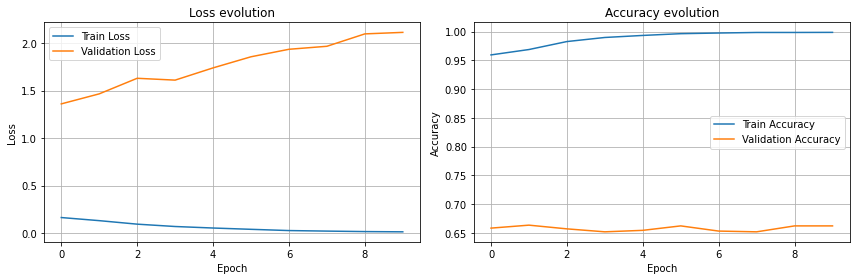

25/25 [==============================] - 0s 12ms/step


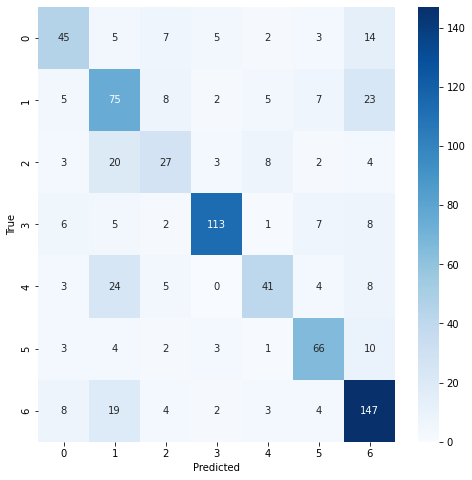

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Train the model and save the history for plotting the line graphs
history = model.fit(augmented_train_images, augmented_train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Plot the training and validation loss during the training process
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss evolution')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Plot the training and validation accuracy during the training process
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy evolution')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Calculate the confusion matrix and plot it
pred_labels = model.predict(test_images)
pred_labels = np.argmax(pred_labels, axis=1)  # The model outputs softmax results, so we take the label with the highest probability as the predicted label
cm = confusion_matrix(test_labels, pred_labels)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



